# Проект по анализу данных


# Задача
В ходе выполнения проекта необходимо решить задачу регрессии, обучив алгоритм предсказывать данные на существующем датасете.

# Описание данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

В качестве набора данных будем использовать датасет с платформы Kaggle (Real estate)
Будем использовать регрессию для прогноза эффективного расхода топлива
Описание данных:   

1) X1 transaction date - дата сделки

2) X2 house age - возраст дома  

3) X3 distance to the nearest MRT station - расстояние до ближайшей станции метро 

4) X4 number of convenience stores - количество круглосуточных магазинов вблизи

5) X5 latitude - широта (координата) 

6) X6 longitude - долгота (координата)  

7) Y house price of unit area - цена


Будем решать задачу регрессии, предсказывая стоимость недвижимости в зависимости от других факторов

Посмотрим, что представлено в данных

In [2]:
data=pd.read_csv("Real estate.csv")

In [3]:
data.shape

(414, 8)

In [4]:
data.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Отсутствующих данных нет

# Разведочный анализ

In [5]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Удалим столбец с номером записи, т.к. он не несет смысловой нагрузки

In [8]:
data = data.drop(['No'], axis=1)

Проверим корреляцию между признаками

# Корреляционный анализ, выбор подходящих признаков

In [9]:
corr = data.corr(method="pearson")

In [10]:
corr

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


Построим тепловую карту корреляции для более наглядного представления

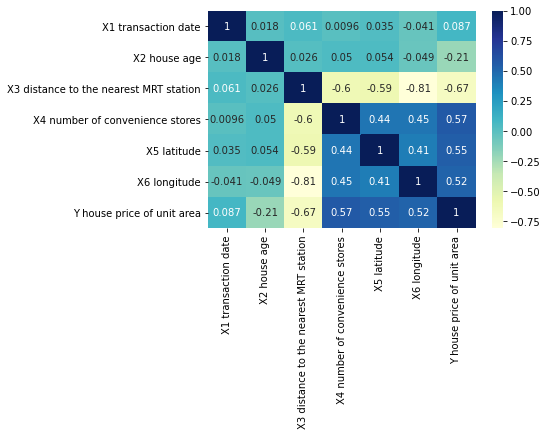

In [11]:
sns.heatmap(corr,cmap="YlGnBu", annot=True)

In [12]:
data.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Построим графики, чтобы понять структуру данных

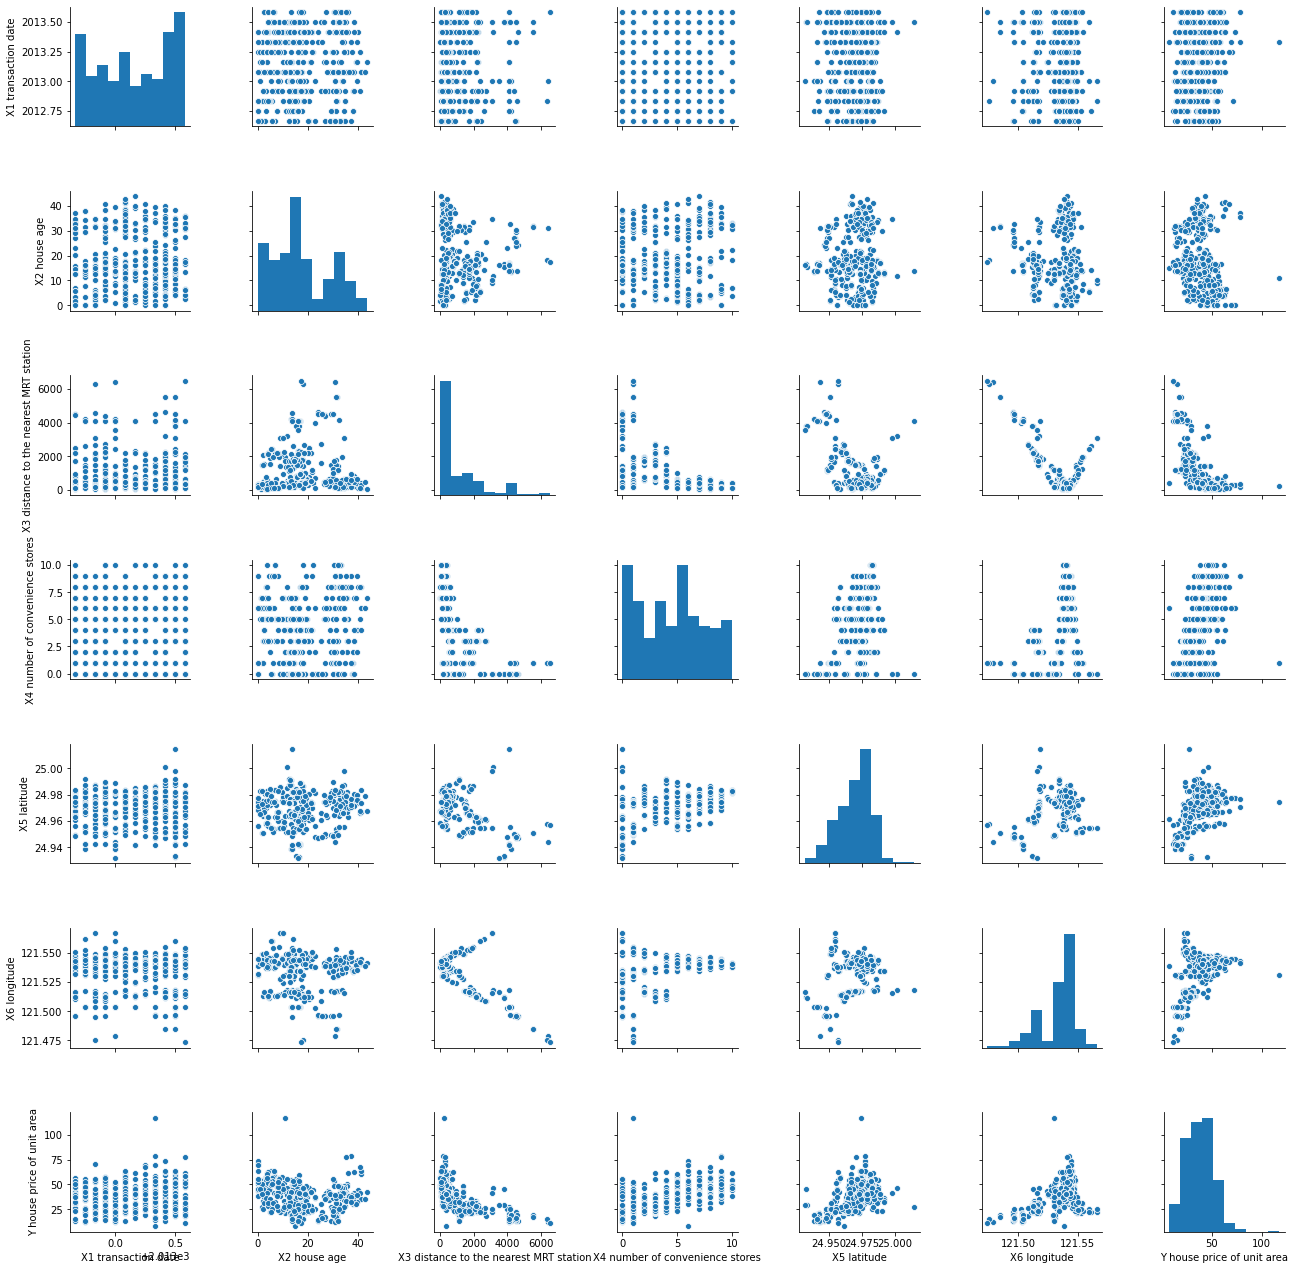

In [13]:
sns.pairplot(data)

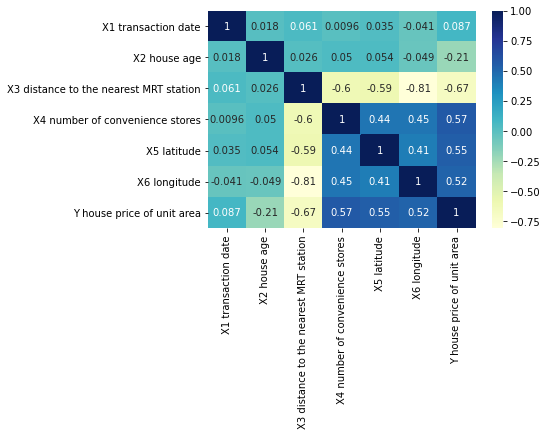

In [14]:
corr = data.corr(method="pearson")
sns.heatmap(corr,cmap="YlGnBu",annot=True)

Мы можем решать задачу регрессии, пытаясь предсказать цену на недвижимость.

Выделим целевой признак и нормализуем данные

In [15]:
target = data['Y house price of unit area']
data = data.drop(['Y house price of unit area'], axis=1)

In [16]:
from sklearn import preprocessing
data = preprocessing.scale(data)

# Метрики качества

В качестве метрик качества мы будет использовать среднюю квадратичную ошибку, среднюю абсолютную ошибку и коэффициент детерминации

Средняя квадратичная ошибка:   
$MAE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N \lvert y_i - \hat{y_i} \rvert $  
где:     
$y$ - истинное значение целевого признака  
$\hat{y}$ - предсказанное значение целевого признака  
$N$ - размер тестовой выборки   
Чем ближе значение к нулю, тем лучше качество регрессии.   
Основная проблема метрики состоит в том, что она не нормирована.  

Средняя абсолютная ошибка:   
$MSE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2 $   
где:   
$y$ - истинное значение целевого признака   
$\hat{y}$ - предсказанное значение целевого признака   
$N$ - размер тестовой выборки   


Коэффициент детерминации:   
$R^2(y,\hat{y}) = 1 - \frac{\sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2}{\sum\limits_{i=1}^N ( y_i - \overline{y_i} )^2} $    
где:   
$y$ - истинное значение целевого признака   
$\hat{y}$ - предсказанное значение целевого признака   
$N$ - размер тестовой выборки    
$\overline{y_i} = \frac{1}{N} \cdot \sum\limits_{i=1}^N y_i $    

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# Выбор моделей

В качестве моделей регрессии выберем модель KneighborsRegressor, а также ансамблевые BaggingRegressor и RandomForestRegressor

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

# Формирование обучающей и тестовой выборки

разделим выборку в пропорции 1:4

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=1)

In [20]:
X_train.shape, y_train.shape

((331, 6), (331,))

In [21]:
X_test.shape, y_test.shape

((83, 6), (83,))

# Базовое решение для всех моделей

In [22]:
def quality(test, predicted):
    print("  Метрики качества:")
    print("     Средняя квадратичная ошибка: "+ str(mean_squared_error(test, predicted)))
    print("     Средняя абсолютная ошибка: "+ str(mean_absolute_error(test, predicted)))
    print("     Коэффициент детерминации: "+str(r2_score(test, predicted)))

In [23]:
models = [KNeighborsRegressor(), BaggingRegressor(), RandomForestRegressor()]
models

[KNeighborsRegressor(), BaggingRegressor(), RandomForestRegressor()]

Обучение модели KNeighborsRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 34.17522409638554
     Средняя абсолютная ошибка: 4.681204819277109
     Коэффициент детерминации: 0.7748460850515273
Обучение модели BaggingRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 78.01978208333334
     Средняя абсолютная ошибка: 5.59531124497992
     Коэффициент детерминации: 0.48598846550512953
Обучение модели RandomForestRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 59.01886915173903
     Средняя абсолютная ошибка: 5.077271227768217
     Коэффициент детерминации: 0.6111706712480316


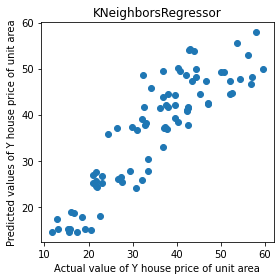

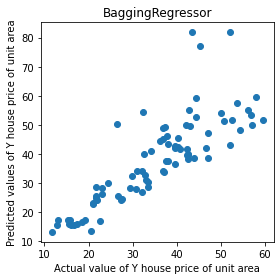

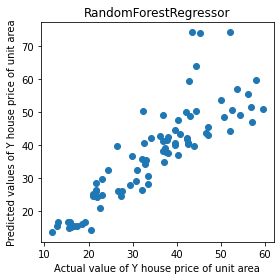

In [24]:
for model in models:
    print("=========================================")
    print("Обучение модели "+type(model).__name__)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test,predicted)
    plt.title(type(model).__name__)
    plt.xlabel('Actual value of Y house price of unit area')
    plt.ylabel('Predicted values of Y house price of unit area')
    plt.tight_layout()
    quality(y_test, predicted)

# Подбор гиперпараметров моделей

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

### Подбор параметров для KNeighborsRegressor

In [26]:
grid_params = {
    'n_neighbors': [3, 5, 11, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsRegressor(), grid_params, verbose=1, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)
0.6377931955606028
KNeighborsRegressor(metric='manhattan', n_neighbors=11, weights='distance')


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    2.9s finished


### Подбор гиперпараметров для модели BaggingRegressor

In [27]:
param_grid = {
    'n_estimators' : [1, 3, 6, 9, 12, 15, 20, 25],
    'max_samples' : [0.05, 0.1, 0.2, 0.5],
    'max_features' : [1, 2, 3, 4]
}

bagging = BaggingRegressor()
grid = GridSearchCV(estimator=bagging, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(estimator=BaggingRegressor(),
             param_grid={'max_features': [1, 2, 3, 4],
                         'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [1, 3, 6, 9, 12, 15, 20, 25]})
0.689228329243963
BaggingRegressor(max_features=4, max_samples=0.5, n_estimators=25)


### Подбор параметров для RandomForestRegressor

In [28]:
grid_params= {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3, 5, 9, 12, 15],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}
grid = GridSearchCV(RandomForestRegressor(), grid_params, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 9, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 4, 6, 8, 10]})
0.6580189827279219
RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_split=4)


# Обучение с оптимальными значениями гиперпараметров

Обучение модели KNeighborsRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 28.84048147848998
     Средняя абсолютная ошибка: 4.2280726131593225
     Коэффициент детерминации: 0.8099925461917393
Обучение модели BaggingRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 45.113515144257015
     Средняя абсолютная ошибка: 5.043154216867469
     Коэффициент детерминации: 0.7027822107861186
Обучение модели RandomForestRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 56.843748189677534
     Средняя абсолютная ошибка: 5.183702126974771
     Коэффициент детерминации: 0.6255008479489483


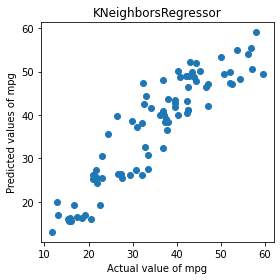

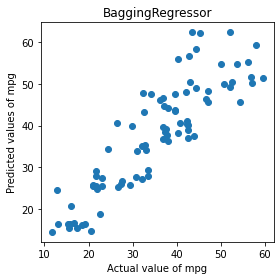

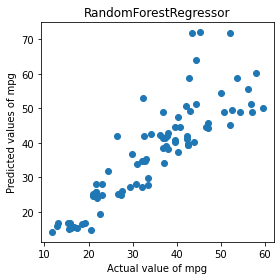

In [29]:
models = [KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='distance'), 
          BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=4, max_samples=0.5, n_estimators=25, n_jobs=None,
                 oob_score=False, random_state=None, verbose=0,
                 warm_start=False),           
          RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
         ]

for model in models:
    print("=========================================")
    print("Обучение модели "+type(model).__name__)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test,predicted)
    plt.title(type(model).__name__)
    plt.xlabel('Actual value of mpg')
    plt.ylabel('Predicted values of mpg')
    plt.tight_layout()
    quality(y_test, predicted)

Лучшей оказалась модель k-ближайших соседей.
Оптимизация гиперпараметров дала ощутимое улучшение. 

Метрики качества показывают, что все модели, построенные в результате выполнения проекта, являются нормальными для их использования. При этом классический алгоритм показал себя лучше ансамблевых моделей.

# Выводы
В ходе выполнения проекта по анализу данных был выбран датасет для решения задачи регрессии.   
Были выбраны 3 модели, входящие в пакет sci-kit learn, и метрики качества, подходящие для регрессионного анализа.    
В ходе разведочного анализа были был удален атрибут No.  
После проведенной оптимизации параметров моделей был сделан вывод о лучшей модели для данной задачи. Ею оказалась модель k-ближайших соседей.